# Results Comparison

## Load and compare results

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load results from CSV files
yolo_default = pd.read_csv('yolo11n_fire_smoke/yolo11n_default/results.csv')
yolo_hyp = pd.read_csv('yolo11n_fire_smoke/yolo11n_hyp/results.csv')
rtdetr_default = pd.read_csv('rtdetr_fire_smoke/rtdetrv2_default/results.csv')
rtdetr_hyp = pd.read_csv('rtdetr_fire_smoke/rtdetrv2_hyp/results.csv')

print("YOLO Default columns:", yolo_default.columns.tolist())
print("YOLO Hyp columns:", yolo_hyp.columns.tolist())
print("RT-DETR Default columns:", rtdetr_default.columns.tolist())
print("RT-DETR Hyp columns:", rtdetr_hyp.columns.tolist())

YOLO Default columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
YOLO Hyp columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
RT-DETR Default columns: ['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
RT-DETR Hyp columns: ['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1

In [8]:
# Figure output directory
import os
fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)
print(f"Saving figures to: {os.path.abspath(fig_dir)}")

Saving figures to: c:\Users\Inkyu_Yang\20242402\jpt\computer-vision-project\figures


## Training Metrics Comparison

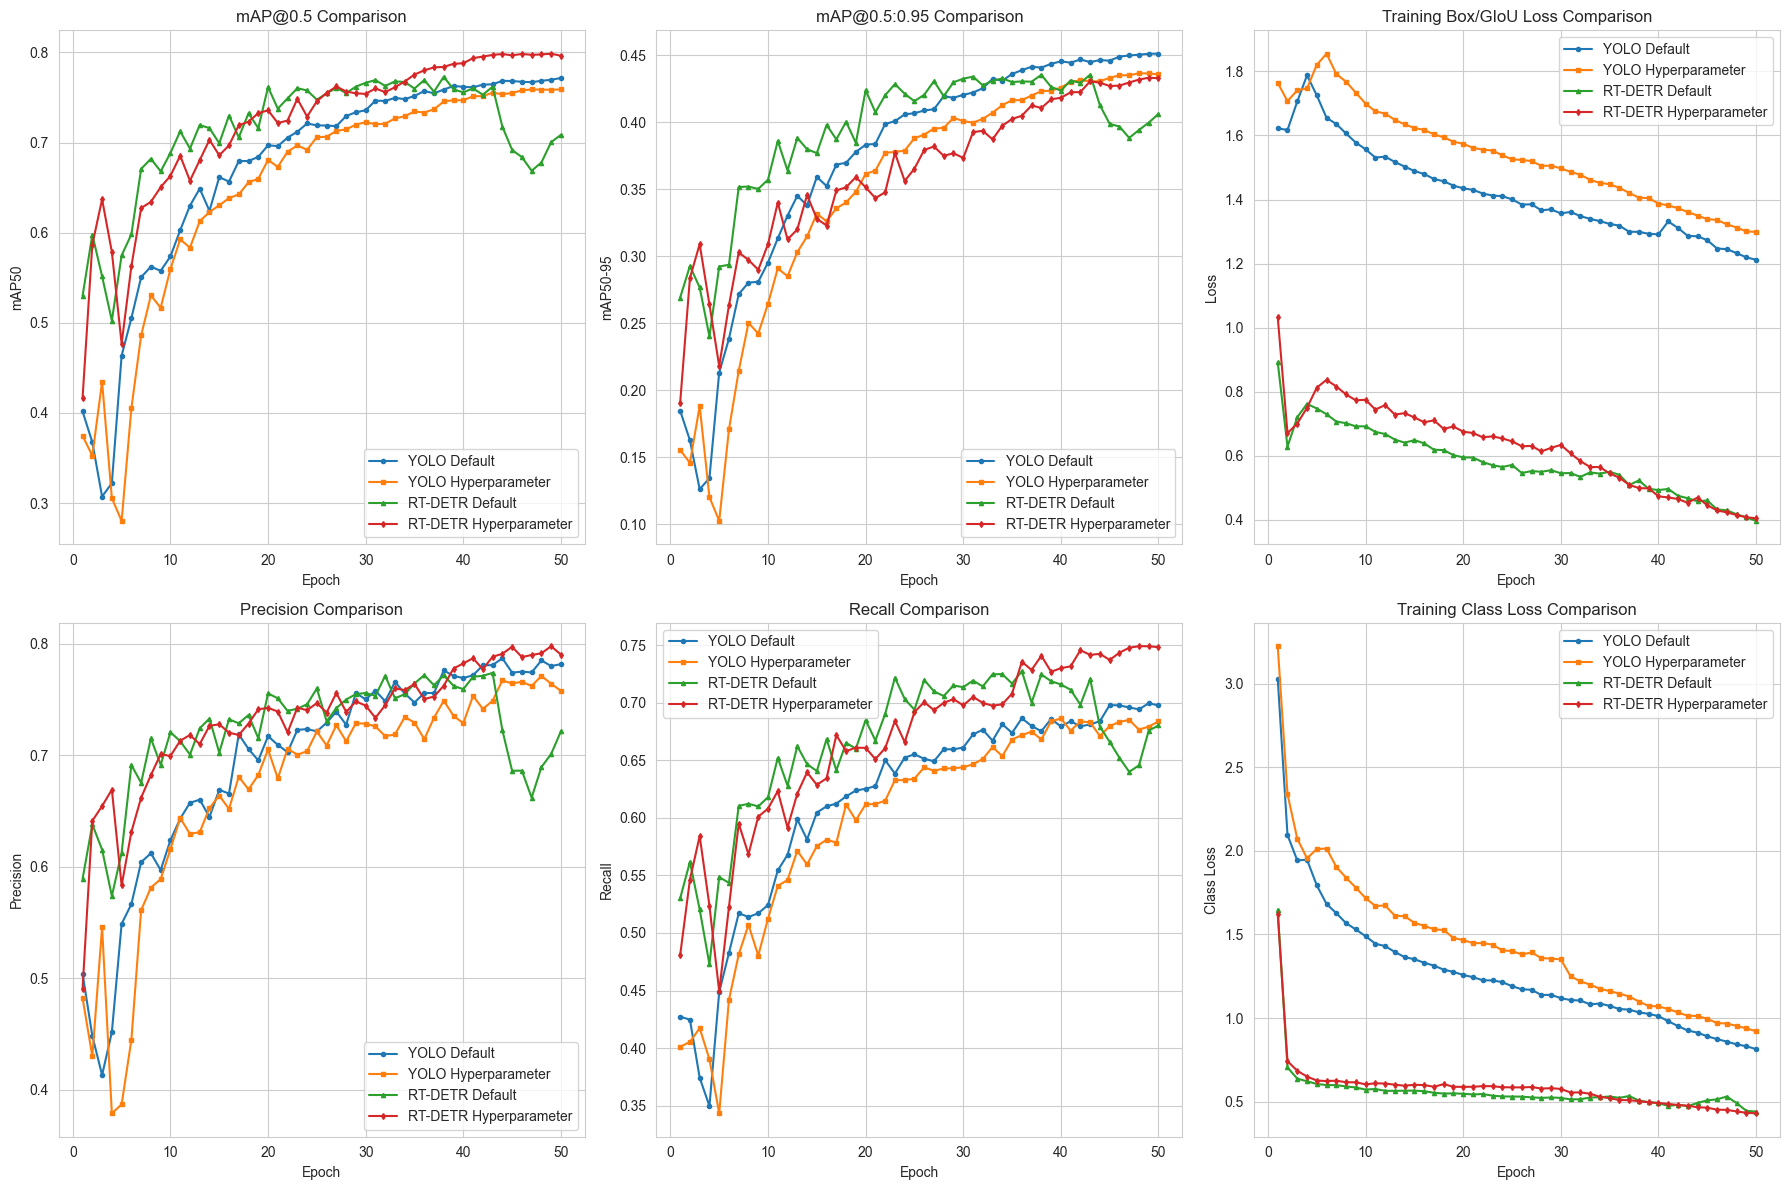

In [9]:
# Create comparison plots for key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Strip whitespace from column names
for df in [yolo_default, yolo_hyp, rtdetr_default, rtdetr_hyp]:
    df.columns = df.columns.str.strip()

metrics = ['metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'train/box_loss']

# Plot mAP50
ax = axes[0, 0]
ax.plot(yolo_default['epoch'], yolo_default['metrics/mAP50(B)'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['metrics/mAP50(B)'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['metrics/mAP50(B)'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['metrics/mAP50(B)'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('mAP50')
ax.set_title('mAP@0.5 Comparison')
ax.legend()
ax.grid(True)

# Plot mAP50-95
ax = axes[0, 1]
ax.plot(yolo_default['epoch'], yolo_default['metrics/mAP50-95(B)'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['metrics/mAP50-95(B)'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['metrics/mAP50-95(B)'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['metrics/mAP50-95(B)'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('mAP50-95')
ax.set_title('mAP@0.5:0.95 Comparison')
ax.legend()
ax.grid(True)

# Plot Box/GIoU Loss
ax = axes[0, 2]
ax.plot(yolo_default['epoch'], yolo_default['train/box_loss'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['train/box_loss'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['train/giou_loss'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['train/giou_loss'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training Box/GIoU Loss Comparison')
ax.legend()
ax.grid(True)

# Plot Precision
ax = axes[1, 0]
ax.plot(yolo_default['epoch'], yolo_default['metrics/precision(B)'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['metrics/precision(B)'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['metrics/precision(B)'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['metrics/precision(B)'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Precision')
ax.set_title('Precision Comparison')
ax.legend()
ax.grid(True)

# Plot Recall
ax = axes[1, 1]
ax.plot(yolo_default['epoch'], yolo_default['metrics/recall(B)'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['metrics/recall(B)'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['metrics/recall(B)'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['metrics/recall(B)'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Recall')
ax.set_title('Recall Comparison')
ax.legend()
ax.grid(True)

# Plot Class Loss
ax = axes[1, 2]
ax.plot(yolo_default['epoch'], yolo_default['train/cls_loss'], label='YOLO Default', marker='o', markersize=3)
ax.plot(yolo_hyp['epoch'], yolo_hyp['train/cls_loss'], label='YOLO Hyperparameter', marker='s', markersize=3)
ax.plot(rtdetr_default['epoch'], rtdetr_default['train/cls_loss'], label='RT-DETR Default', marker='^', markersize=3)
ax.plot(rtdetr_hyp['epoch'], rtdetr_hyp['train/cls_loss'], label='RT-DETR Hyperparameter', marker='d', markersize=3)
ax.set_xlabel('Epoch')
ax.set_ylabel('Class Loss')
ax.set_title('Training Class Loss Comparison')
ax.legend()
ax.grid(True)

plt.tight_layout()
# Save figure
plt.savefig(os.path.join(fig_dir, 'comparison_training_metrics.png'), dpi=200, bbox_inches='tight')
plt.show()

## Final Performance Summary

In [10]:
# Get final epoch results
summary_data = {
    'Model': ['YOLO Default', 'YOLO Hyperparameter', 'RT-DETR Default', 'RT-DETR Hyperparameter'],
    'mAP50': [
        yolo_default['metrics/mAP50(B)'].iloc[-1],
        yolo_hyp['metrics/mAP50(B)'].iloc[-1],
        rtdetr_default['metrics/mAP50(B)'].iloc[-1],
        rtdetr_hyp['metrics/mAP50(B)'].iloc[-1]
    ],
    'mAP50-95': [
        yolo_default['metrics/mAP50-95(B)'].iloc[-1],
        yolo_hyp['metrics/mAP50-95(B)'].iloc[-1],
        rtdetr_default['metrics/mAP50-95(B)'].iloc[-1],
        rtdetr_hyp['metrics/mAP50-95(B)'].iloc[-1]
    ],
    'Precision': [
        yolo_default['metrics/precision(B)'].iloc[-1],
        yolo_hyp['metrics/precision(B)'].iloc[-1],
        rtdetr_default['metrics/precision(B)'].iloc[-1],
        rtdetr_hyp['metrics/precision(B)'].iloc[-1]
    ],
    'Recall': [
        yolo_default['metrics/recall(B)'].iloc[-1],
        yolo_hyp['metrics/recall(B)'].iloc[-1],
        rtdetr_default['metrics/recall(B)'].iloc[-1],
        rtdetr_hyp['metrics/recall(B)'].iloc[-1]
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n=== Final Performance Comparison ===")
print(summary_df.to_string(index=False))

# Find best model for each metric
print("\n=== Best Model per Metric ===")
for metric in ['mAP50', 'mAP50-95', 'Precision', 'Recall']:
    best_idx = summary_df[metric].idxmax()
    best_model = summary_df.loc[best_idx, 'Model']
    best_value = summary_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_value:.4f})")


=== Final Performance Comparison ===
                 Model   mAP50  mAP50-95  Precision  Recall
          YOLO Default 0.77168   0.45115    0.78150 0.69762
   YOLO Hyperparameter 0.75896   0.43567    0.75753 0.68371
       RT-DETR Default 0.70850   0.40622    0.72125 0.68018
RT-DETR Hyperparameter 0.79631   0.43282    0.79008 0.74818

=== Best Model per Metric ===
mAP50: RT-DETR Hyperparameter (0.7963)
mAP50-95: YOLO Default (0.4511)
Precision: RT-DETR Hyperparameter (0.7901)
Recall: RT-DETR Hyperparameter (0.7482)


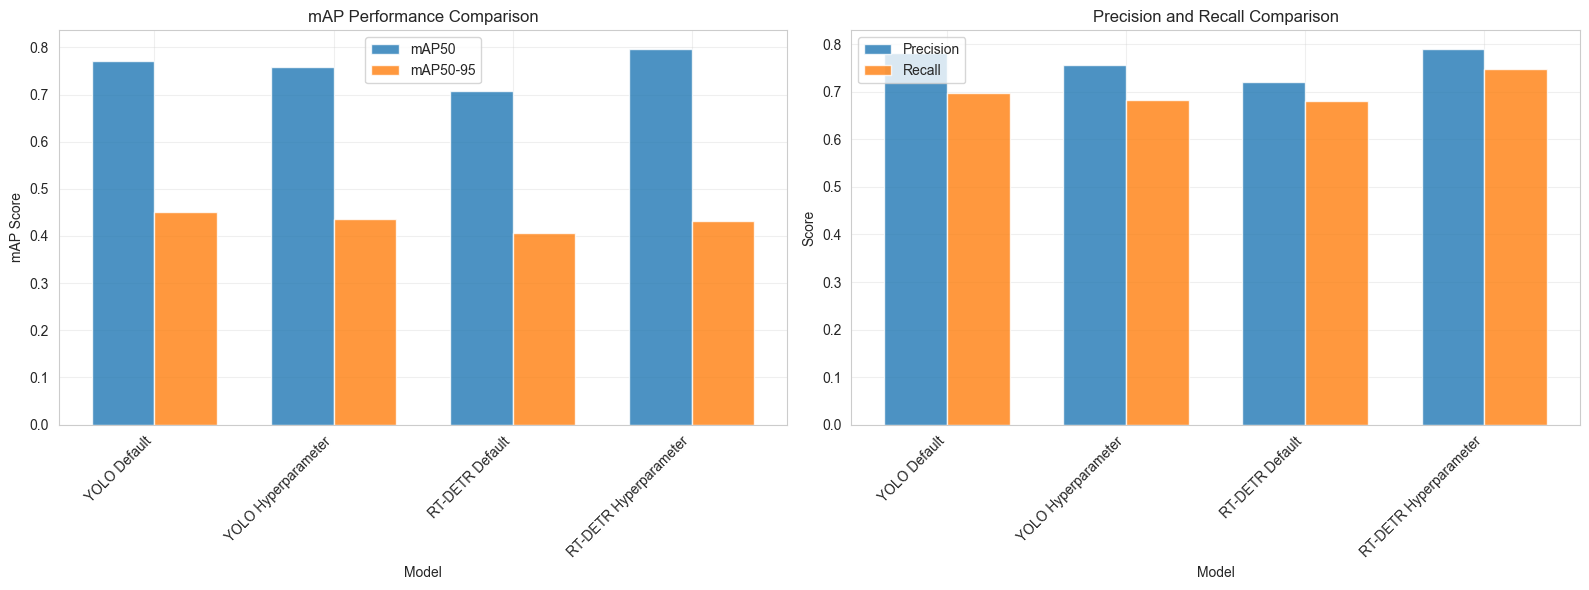

In [11]:
# Visualize final performance comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for mAP metrics
ax = axes[0]
x = range(len(summary_df))
width = 0.35
ax.bar([i - width/2 for i in x], summary_df['mAP50'], width, label='mAP50', alpha=0.8)
ax.bar([i + width/2 for i in x], summary_df['mAP50-95'], width, label='mAP50-95', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('mAP Score')
ax.set_title('mAP Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Bar chart for Precision and Recall
ax = axes[1]
ax.bar([i - width/2 for i in x], summary_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar([i + width/2 for i in x], summary_df['Recall'], width, label='Recall', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
# Save figure
plt.savefig(os.path.join(fig_dir, 'final_performance_summary.png'), dpi=200, bbox_inches='tight')
plt.show()

## Improvement Analysis (Default vs Hyperparameter Tuning)


=== Hyperparameter Tuning Improvement ===
  Model  mAP50 Improvement (%)  mAP50-95 Improvement (%)  Precision Improvement (%)  Recall Improvement (%)
   YOLO              -1.648352                 -3.431231                  -3.067179               -1.993922
RT-DETR              12.393790                  6.548176                   9.543154                9.997354


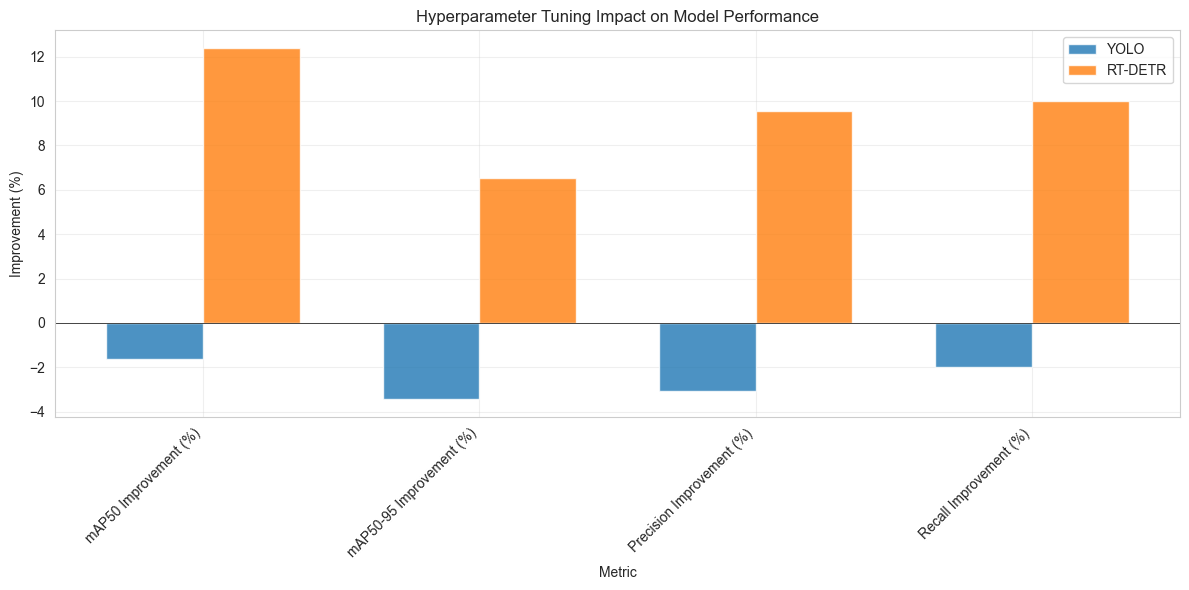

In [12]:
# Calculate improvement from hyperparameter tuning
improvement_data = {
    'Model': ['YOLO', 'RT-DETR'],
    'mAP50 Improvement (%)': [
        ((yolo_hyp['metrics/mAP50(B)'].iloc[-1] - yolo_default['metrics/mAP50(B)'].iloc[-1]) / yolo_default['metrics/mAP50(B)'].iloc[-1] * 100),
        ((rtdetr_hyp['metrics/mAP50(B)'].iloc[-1] - rtdetr_default['metrics/mAP50(B)'].iloc[-1]) / rtdetr_default['metrics/mAP50(B)'].iloc[-1] * 100)
    ],
    'mAP50-95 Improvement (%)': [
        ((yolo_hyp['metrics/mAP50-95(B)'].iloc[-1] - yolo_default['metrics/mAP50-95(B)'].iloc[-1]) / yolo_default['metrics/mAP50-95(B)'].iloc[-1] * 100),
        ((rtdetr_hyp['metrics/mAP50-95(B)'].iloc[-1] - rtdetr_default['metrics/mAP50-95(B)'].iloc[-1]) / rtdetr_default['metrics/mAP50-95(B)'].iloc[-1] * 100)
    ],
    'Precision Improvement (%)': [
        ((yolo_hyp['metrics/precision(B)'].iloc[-1] - yolo_default['metrics/precision(B)'].iloc[-1]) / yolo_default['metrics/precision(B)'].iloc[-1] * 100),
        ((rtdetr_hyp['metrics/precision(B)'].iloc[-1] - rtdetr_default['metrics/precision(B)'].iloc[-1]) / rtdetr_default['metrics/precision(B)'].iloc[-1] * 100)
    ],
    'Recall Improvement (%)': [
        ((yolo_hyp['metrics/recall(B)'].iloc[-1] - yolo_default['metrics/recall(B)'].iloc[-1]) / yolo_default['metrics/recall(B)'].iloc[-1] * 100),
        ((rtdetr_hyp['metrics/recall(B)'].iloc[-1] - rtdetr_default['metrics/recall(B)'].iloc[-1]) / rtdetr_default['metrics/recall(B)'].iloc[-1] * 100)
    ]
}

improvement_df = pd.DataFrame(improvement_data)
print("\n=== Hyperparameter Tuning Improvement ===")
print(improvement_df.to_string(index=False))

# Visualize improvements
fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['mAP50 Improvement (%)', 'mAP50-95 Improvement (%)', 'Precision Improvement (%)', 'Recall Improvement (%)']
x = range(len(metrics))
width = 0.35

ax.bar([i - width/2 for i in x], improvement_df.iloc[0, 1:], width, label='YOLO', alpha=0.8)
ax.bar([i + width/2 for i in x], improvement_df.iloc[1, 1:], width, label='RT-DETR', alpha=0.8)
ax.set_xlabel('Metric')
ax.set_ylabel('Improvement (%)')
ax.set_title('Hyperparameter Tuning Impact on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
# Save figure
plt.savefig(os.path.join(fig_dir, 'improvement_analysis.png'), dpi=200, bbox_inches='tight')
plt.show()